# Predictive project of oil price

## ECON 570 Final project 
### Kaiyuan Chen       ID:2061171566
### Wenbo Wang    ID:  4574446397
### Zezhao Li    ID:  6020657455

## 1.Introduction


a.The oil price is notorious for its volatility. While shale revolution alleviate the supply concern of the global oil market, the economic policy uncertainty after COVID-19 and Russia-Ukraine war becomes a key factor influencing oil price. In this project we try to deal with the predictive issue of oil price, including the independent variable of both oil market fundamental and economic policy uncertainty.

b.After the financial crisis, profound changes have taken place in the global political and economic pattern. Frictions between major powers in the world have intensified, trade protectionism has risen, and events such as "Brexit" and "Sino-US trade war" have significantly increased the uncertainty of economic policies and caused a major impact on the international crude oil market. China's economic development has attracted worldwide attention since 2000. Despite the challenges posed by external shocks to China's economic development in recent years, China's GDP has maintained steady growth under the effective government policy regulation. However, China's energy and resource structure is unbalanced and oil and gas resources are relatively scarce. The continuous growth of the national economy has driven up China's demand for crude oil, and China's dependence on crude oil imports has been increasing. Now China has become the world's largest importer of crude oil, and energy security issues are becoming increasingly prominent.


In recent years, due to the impact of COVID-19 and the Russia-Ukraine war, the volatility of international crude oil prices has increased significantly. Since the outbreak of the global new crown epidemic, affected by factors such as economic recovery and policy easing, major oil-producing countries have actively or passively cut crude oil production significantly, geopolitical conflicts and other factors, after experiencing a sharp drop in the early stage of the epidemic, the current oil price is likely to have changed from 2014-2014- The low-price equilibrium range in 2020 runs to the high-price equilibrium range. In the absence of a large positive supply shock or negative demand shock, it is expected that oil prices may continue to operate in a high equilibrium range (above $80/barrel) in the next few years.

It is very important to study the prediction of oil prices to guarantee China's energy security and end-user hedging.Zhang.et al(2022) proposed that ,from the perspective of linear regression, industry classification, and input-output price model, we analyze the impact of oil prices on domestic CPI. From three perspectives, a 10% increase in crude oil prices (after exchange rate conversion) will have an impact on the PPI of about 0.35-0.7 percentage points.

c.The EPU index constructed by Baker et al. (2016) provides a measure of economic policy uncertainty. Since international crude oil prices are closely related to the macro economy (Kilian, 2009; Kilian and Murphy, 2014), some scholars use this index to study the relationship between economic policy uncertainty and international oil prices. Kang and Ratti (2013) analyzed the response of us economic policy uncertainty to international crude oil supply, real demand and speculative demand. The paper found that the increase of speculative demand for crude oil would lead to the increase of US economic policy uncertainty, and the positive impact of real demand for crude oil would reduce the uncertainty of US economic policy. But oil supply shocks have no significant impact on us economic policy uncertainty. Bekiros et al. (2015) pointed out that the fluctuation of crude oil price affects the economic growth and inflation in the United States, so the prediction of crude oil price is very important. In this paper, different time series models are used to analyze the impact of economic policy uncertainty on international oil prices, and the conclusion is that TVP-VAR model has the best prediction effect, and it is proved that the information of economic policy uncertainty is helpful for oil price prediction. Aloui (2016) used Copula to study the relationship between economic policy uncertainty and international oil price return rate, and used rolling window regression method to analyze the dynamic impact of stock market and economic policy uncertainty on oil price return rate. 

## 2.Data

a.In this project we use four datasets for the modelling. We use Brent spot price to represent global oil price, sourcing from EIA. With regard to oil fundamental data, we acquire global oil supply data from Rifinitive, and we use Kilian’s shipping index (GBC) to quantify global business cycle, which is widely used in the literature. As for economic policy uncertainty data, it’s can be found on the website http://policyuncertainty.com/global_monthly.html.

b.As complying with EPU data time series, we limit the sample to start on Jan 1997.

c.We merge the four datasets into an integrated oil market data, the time span is from Jan 1997 to Dec 2021. Then we research on the summary statistics.

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn import metrics


os.chdir(r'C:\Users\Administrator\Desktop\homework')


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'C:\\Users\\Administrator\\Desktop\\homework'

In [ ]:
#Data preprocessing

#EPU

epu = pd.read_excel('epu.xlsx')
epu['Date'] = pd.date_range(start='1997-01-31',end='2022-02-28',freq='M') #normalize time labels
epu = epu[['Date','epu']]
epu

In [ ]:
#supply

supply = pd.read_csv('supply.csv',parse_dates=['Date'])
# supply['supply'] = supply['supply'].apply(lambda x:math.log(x))
# supply['supply'] = supply['supply'].diff()
supply = supply.sort_values(ascending=True,by='Date') #Change sequence
supply['Date'] = pd.to_datetime(supply['Date']) #Change time format
supply

In [ ]:
#gbc

gbc = pd.read_excel('rea.xlsx',parse_dates=['Date'])
gbc['Date'] = pd.date_range(start='1968-01-31',end='2021-12-31',freq='M')
gbc

In [ ]:
#oil

oil = pd.read_excel('oil.xls',sheet_name='Data 1',header=2)
oil['Date'] = pd.date_range(start='1987-05-31',end='2022-03-31',freq='M')
oil.columns = ['Date','oil']
# oil['oil'] = oil['oil'].apply(lambda x:math.log(x))
# oil['oil'] = oil['oil'].diff()
oil

In [ ]:
#Merge data

data = pd.merge(oil,supply,on='Date')
data = pd.merge(data,gbc,on='Date')
data = pd.merge(data,epu,on='Date')
data

d.The average oil price from 1997 to 2021 is 58 dollar per barrel, so the current above 100 dollar oil price is largely higher than the historical price. The average EPU value in the past 15 years is 130, however its maximum value once reached 430, indicating there’s lots of variance in economic policy from 1997 to 2021.

In [ ]:
#Descriptive characters

data.describe()

We also construct the correlation matrix to infer the causal relationship of oil price. As we can see from figure 1, oil price seems to be closely correlated with oil supply ,while EPU and GBC rank the second and the third place.

In [ ]:
#Correlations

# data.corr()
sns.heatmap(data.corr())

In [ ]:
data.corr()

# 3.Modeling

a.Hamilton indicated the relationship between macroeconomy and oil price is nonlinear. Traditionally the researchers mostly use time series models to predict oil price, however much structure in time series model is linear. In this study we resort to support vector machine regression model for the oil price prediction issue.
Support vector machines can be used for regression problems, namely, Support vector machine regression (SVR). Support vector machine (SVM), based on VC dimension theory and structural risk minimization principle, was initially used to solve the problem of binary classification (support vector machine classification), and later extended to solve the problem of function approximation, namely support vector regression (SVR). In general, the kernel technique can be used to transform the nonlinear sample set as input into higher dimensional space to improve sample separation. This project uses SVR algorithm for modeling prediction.
As mentioned before, we use supply,GBC and EPU in oil market as independent variables, and oil price is the predictive variable. We divide the samples into 70 % training sets and 30% test set, then we use support vector model in Python to predict oil price. Finally, we apply RMSE to validate the result. 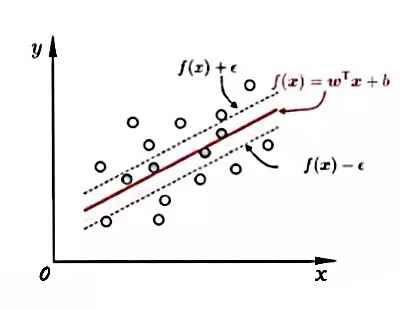



Compared with linear regression, support vector regression means that the prediction is correct as long as the value inside the dotted line is calculated, and the loss of the value outside the dotted line is calculated. Considering the situation of linear inseparability in SVM, the optimization problem of support vector machine regression is finally obtained by introducing relaxation variables

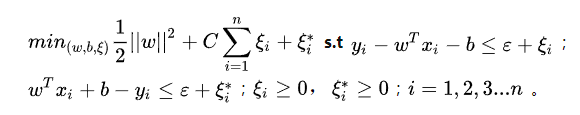

In [ ]:
#SVR predict

X = data.drop(['Date','oil'],axis=1)
Y = data['oil']

In [ ]:
#Train,test group

X_train = X[:210]
X_test = X[210:]
Y_train = Y[:210]
Y_test = Y[210:]

In [ ]:
#Train SVR

svr_model = svm.SVR(kernel='poly')
svr_model.fit(X_train,Y_train)
confidence = svr_model.score(X_train,Y_train)
print(confidence)

# 4.Findings

a.For the base model analysis, we conclude that the RMSE value is 89. This result is somewaht large, indicating the model design could be upgated to make a better RMSE outcome. We again check on the oil price literature, and we find the oil price theory admit that there's reverse causality in oil price modeling. That is, the macroeconomic variable can lead to the change of oil price, while it's possible oil price can affect macroeconomy. Specifically, for EPU variable, Kang(2013) showed it's basically that oil price impact EPU.


b.In the second step as a robustness check, we drop EPU variable and get the new SVR RMSE result, which is 18. This result porves that complicated models are not necessarily better that simple models.

In [2]:
#Predict value

Y_pred = svr_model.predict(X_test)

NameError: name 'svr_model' is not defined

In [3]:
#MSE value

print(math.sqrt(metrics.mean_squared_error(np.array(Y_test),Y_pred)))

NameError: name 'Y_test' is not defined

In [4]:
X = data.drop(['Date','oil','epu'],axis=1)
Y = data['oil']

X_train = X[:210]
X_test = X[210:]
Y_train = Y[:210]
Y_test = Y[210:]

NameError: name 'data' is not defined

In [5]:
#Train SVR

svr_model = svm.SVR(kernel='poly')
svr_model.fit(X_train,Y_train)
confidence = svr_model.score(X_train,Y_train)

print(confidence)

#Predict value

Y_pred = svr_model.predict(X_test)

#MSE value

print(math.sqrt(metrics.mean_squared_error(np.array(Y_test),Y_pred)))

NameError: name 'X_train' is not defined

# 5. Conclusions

a. In this paper, we use the machine learning method of support vector machine to explore the oil price prediction problem. On the one hand, there is a certain mean square error between the predicted value and the real value of the fitted model, indicating that the factors determining the international crude oil price are complex and there may be missing variables in the model. On the other hand, when we remove the uncertainty of economic policy from the model, the mean square error obtained by using only the supply and demand variable of oil price is smaller. This suggests that it’s not always the case more complex model is better, and we find that economic policy uncertainty is not the core variable affecting oil prices. 

b. In future studies, we will further clarify the theory of oil price determination and establish a more effective oil price prediction model.

# 6.Reference

[1]	Aloui, Riadh & Gupta, Rangan & Miller, Stephen M., 2016. "Uncertainty and crude oil returns," Energy Economics, Elsevier, vol. 55(C), pages 92-100.[1]	Aloui, Riadh & Gupta, Rangan & Miller, Stephen M., 2016. "Uncertainty and crude oil returns," Energy Economics, Elsevier, vol. 55(C), pages 92-100.<br /> 
[2]	Baker, Scott R., Nicholas Bloom, and Steven J. Davis. 2016. “Measuring Economic Policy Uncertainty.” [J]Quarterly Journal of Economics 131 (4): 1593–636.<br /> 
[3]	Baumeister, Christiane and Gert Peersman (2013). “The Role of Time-Varying Price Elasticities in Accounting for Volatility Changes in the Crude Oil Market.” [J]Journal of Applied Econometrics<br /> 
[4]	El Montasser, G., Aggad, K., Clark, L., Gupta, R., Kemp, S., 2014. Causal link between oil price and uncertainty in India. Working Paper No. 201467. University of Pretoria, Department of Economics.<br /> 
[5]	Elliot, G., T.J., Rothenberg, J.H., Stock, 1996. Efficient tests for an autoregressive unit root.Econometrica 64, 813–836.<br /> 
[6]	Hamilton, J.D., 2013. Historical Oil Shocks. In: Parker, Randall E., Whaples, Robert (Eds.),<br /> 
[7]	Hamilton, James D., and J. Cynthia Wu. 2014. Risk premia in crude oil futures prices. [J]Journal of International Money and Finance 42: 9-37.<br /> 
[8]	Kang, W., Ratti, R.A., Vespignani, J.L., 2017. Oil price shocks and policy uncertainty: new evidence on the effects of US and non-US oil production. Energy Econ. 66, 536–546.<br /> 
[9]	Stelios Bekiros & Rangan Gupta & Alessia Paccagnini, 2015. "Oil Price Forecastability and Economic Uncertainty," Working Papers 298, University of Milano-Bicocca, Department of Economics, revised Apr 2015.<br /> 
[10]	Yu, J., and Y. Yuan. 2011. Investor sentiment and the mean-variance relation. Journal of Financial Economics 100: 367–381.<br /> 
[11]	Yu, L., Wang, S., Lai, K.K., 2008. Forecasting crude oil price with an EMD-based neural network ensemble learning paradigm. Energy Econ. 30 (5), 2623–2635.<br /> 
[12]	Zagaglia, P., 2010. Macroeconomic factors and oil futures prices: a data-rich model.<br /> 
[13]	Zeng, Ka. 2003. Trade Threats, Trade Wars: Bargaining, Retaliation, and American Coercive Diplomacy.Ann Arbor, [J]MI: University of Michigan Press.<br /> 
[14]	Zhang, J.L., Zhang, Y.J., Zhang, L., 2015. A novel hybrid method for crude oil price forecasting. Energy Econ. 49, 649–659.<br /> 
[15]	Zheng Tracy Ke, Bryan T. Kelly, Dacheng Xiu(2019) “Predicting Returns With Text Data” [J]NBER working paper<br /> 
[16]   Zhang, Yu, and Chunsheng Fu. 2022. “An Article Explaining the Impact of Rising Oil Prices on Domestic Inflation - Solving the Case ‘Steady Growth’ Series Eleven.”
